In [1]:
# Needed imports
from MarkinchiParser import MarkinchiParser as MIParser
from MarkinchiGenerator import MarkinchiGenerator as MIGenerator
import MarkinchiUtils as MIUtils
from rdkit import Chem
from rdkit.Chem import Draw
import os

In [2]:
# Generate a MarkInChI from a V3000 .mol file
filename = "molfiles\\test39.mol"
filedir = os.path.join(os.getcwd(), filename)

generator = MIGenerator()
generator.get_from_molfile(filedir)
markinchi = generator.generate_markinchi()
print(markinchi)

MarkInChI=1B/C24H40O2/c1-16(7-12-22(25)26)19-10-11-20-18-9-8-17-6-4-5-14-23(17,2)21(18)13-15-24(19,20)3/h16-21H,4-15H2,1-3H3,(H,25,26)<M>4H,5H,6H,8H,9H,10H,11H,13H,14H,15H,17H,18H,19H,20H,21H-HOZz/c1-2/h1H</M><M>4H,5H,6H,8H,9H,10H,11H,13H,14H,15H,17H,18H,19H,20H,21H-HOZz/c1-2/h1H</M><M>4H,5H,6H,8H,9H,10H,11H,13H,14H,15H,17H,18H,19H,20H,21H-HOZz/c1-2/h1H</M>


[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo



In [3]:
# Generate a list of Mols from a MarkInChI
parser = MIParser(markinchi)
mol, rgroups = parser.parse_markinchi()
mol_list = MIUtils.enumerate_markush_mol(mol, rgroups)

[12:19:46] Explicit valence for atom # 3 C, 5, is greater than permitted


Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule
Skipping an invalid molecule


[12:19:46] Explicit valence for atom # 16 C, 5, is greater than permitted
[12:19:46] Explicit valence for atom # 17 C, 5, is greater than permitted
[12:19:46] Explicit valence for atom # 18 C, 5, is greater than permitted
[12:19:46] Explicit valence for atom # 19 C, 5, is greater than permitted
[12:19:46] Explicit valence for atom # 20 C, 5, is greater than permitted
[12:19:46] Explicit valence for atom # 4 C, 5, is greater than permitted
[12:19:46] Explicit valence for atom # 16 C, 5, is greater than permitted
[12:19:46] Explicit valence for atom # 17 C, 5, is greater than permitted
[12:19:46] Explicit valence for atom # 18 C, 5, is greater than permitted
[12:19:46] Explicit valence for atom # 19 C, 5, is greater than permitted
[12:19:46] Explicit valence for atom # 20 C, 5, is greater than permitted
[12:19:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[12:19:46] Explicit valence for atom # 16 C, 5, is greater than permitted
[12:19:46] Explicit valence for atom # 1

In [4]:
# Compute the InChI for each Mol in the list of Mols
inchi_list = MIUtils.inchis_from_mol_list(mol_list)

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefined stereo

[12:19:46] WARNING: Omitted undefi

d:\alexl\Documents\MarkInChiV2\.conda\Lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


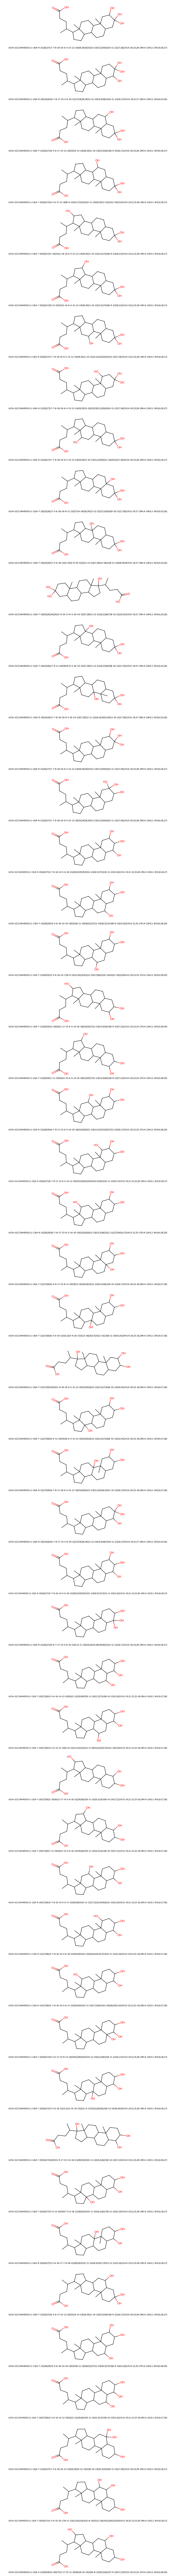

In [5]:
# Show each Mol in the list of Mols along with its InChI
# NB you may need to fiddle around with the parameters to get something legible, depending on how many Mols there are / how long the InChIs are
# If you get a 'File parsing error: PNG header not recognized', this seems to be due to the image being too big - try reducing the height of
# each image using subImgSize, or truncating the list by specifying maxMols

for mol in mol_list:
    Chem.rdDepictor.Compute2DCoords(mol)

Draw.MolsToGridImage(mol_list, molsPerRow=1, maxMols=50, legends=inchi_list, subImgSize=(1024, 300))